<a href="https://colab.research.google.com/github/VladousSparrowous/cows_bulls_matching/blob/main/COWHUB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
# @title data

!pip install yadisk

from yadisk import YaDisk

TOKEN = 'y0__xDt-vicARjT5jcgt6WvlRP5xSD0N01JrxRfj2aLysyWdsvd4A'
yd = YaDisk(token=TOKEN)

# Проверяем, что токен рабочий
if yd.check_token():
    print("✅ Успешное подключение к Яндекс.Диску!")
else:
    print("❌ Ошибка: неверный токен")


folder_path = "тест коров/data/"  # Папка на Яндекс.Диске
save_dir = "/content/data/"       # Папка в Colab

!mkdir -p {save_dir}

for file in yd.listdir(folder_path):
    if file.name.endswith(".csv"):
        print(file.name)
        yd.download(folder_path + file.name, save_dir + file.name)



✅ Успешное подключение к Яндекс.Диску!
bulls.csv
cows.csv
pedigree.csv


In [43]:
# @title data info

import pandas as pd
import numpy as np

df_bulls = pd.read_csv('/content/data/bulls.csv')
df_cows = pd.read_csv('/content/data/cows.csv')
df_pedigree = pd.read_csv('/content/data/pedigree.csv')

print(df_bulls.sample(5))
print(df_bulls.info())
print(df_bulls['id'].duplicated().sum())

print(df_cows.sample(5))
print(df_cows.info())
print(df_cows['id'].duplicated().sum())

print(df_pedigree.sample(5))
print(df_pedigree.info())
print(df_pedigree['id'].duplicated().sum())

               id  descendants_count     ebv
38  NL00000050788                  1   691.9
8   DE00000003760                369  1138.5
37  NL00000060143                  1  -656.6
1   NL00000001842                325  -597.6
27  FR00000051087                266    23.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 39 non-null     object 
 1   descendants_count  39 non-null     int64  
 2   ebv                38 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.0+ KB
None
0
                  id    ebv
6782   DE00000083113   65.0
6974   DE00000062274 -115.8
4947   DE00000093312 -820.3
2967   DE00000048640  -80.3
15065  GB00000089921 -156.7
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17177 entries, 0 to 17176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  -

In [44]:
# @title bulls family
df_b_join_p = df_bulls.copy()
df_b_join_p = df_b_join_p.join(df_pedigree.set_index('id'), on='id')

df_grand = pd.merge(
    df_b_join_p,
    df_pedigree,
    left_on='mother_id',
    right_on='id',
    how='left',
    suffixes=('', '_m')
    )
df_grand = df_grand.drop(columns=['id_m'])

df_grand = pd.merge(
    df_grand,
    df_pedigree,
    left_on='father_id',
    right_on='id',
    how='left',
    suffixes=('', '_f')
    )

df_grand = df_grand.drop(columns=['id_f'])

df_grand

,id,descendants_count,ebv,mother_id,father_id,mother_id_m,father_id_m,mother_id_f,father_id_f
0,FR00000000479,476,690.7,US00000000802,RU00000000555,FR00000000028,US00000000716,US00000000856,FR00000001241
1,NL00000001842,325,-597.6,DE00000001681,US00000001532,DE00000002197,NL00000001343,FR00000001533,DE00000001398
2,US00000003013,436,1528.6,US00000002320,FR00000000342,DE00000002323,NL00000001106,US00000000343,RU00000000609
3,US00000001653,1097,1193.2,FR00000001777,FR00000001711,DE00000001940,DE00000000644,GB00000001560,RU00000000704
4,DE00000001742,496,1510.6,RU00000002032,NL00000002129,RU00000001712,DE00000002061,RU00000001817,RU00000000650
5,GB00000002348,522,1315.3,US00000002351,NL00000001465,FR00000002352,FR00000001270,NL00000001602,FR00000000566
6,US00000002804,355,1444.3,RU00000003167,FR00000003056,DE00000003173,FR00000002539,GB00000002546,FR00000000812
7,FR00000002912,1250,1238.7,RU00000002923,FR00000001173,FR00000002849,GB00000001964,RU00000001323,DE00000000344
8,DE00000003760,369,1138.5,DE00000003490,FR00000001173,RU00000003400,US00000003099,RU00000001323,DE00000000344
9,DE00000003486,472,1085.5,FR00000003287,RU00000003381,RU00000003288,RU00000000650,RU00000003384,GB00000001964


In [45]:
# @title replacing NaN in ebv with mean

'''
ebv = df_bulls['ebv'].dropna().mean()

df_bulls['ebv'] = df_bulls['ebv'].fillna(ebv)
df_bulls

ebv = df_cows['ebv'].dropna().mean()

df_cows['ebv'] = df_cows['ebv'].fillna(ebv)
df_cows
'''

"\nebv = df_bulls['ebv'].dropna().mean()\n\ndf_bulls['ebv'] = df_bulls['ebv'].fillna(ebv)\ndf_bulls\n\nebv = df_cows['ebv'].dropna().mean()\n\ndf_cows['ebv'] = df_cows['ebv'].fillna(ebv)\ndf_cows\n"

# pedigree analyse

  The analysis shows that there are two large families, each with half of the bulls, and in the simplest model, you can pair them up by taking bulls and cows from different families.

In [46]:
# @title pedigree to dict

from collections import defaultdict

pedigree_dict = defaultdict(list)
all_cows = set()

bulls_in_pedigree = set()
cows_in_pedigree = set()

for _, row in df_pedigree.iterrows():

  id = row['id']
  mother = row['mother_id']
  father = row['father_id']

  all_cows.add(id)

  pedigree_dict[id] = []

  if pd.notna(father):
    pedigree_dict[id].append(father)
    all_cows.add(father)
    bulls_in_pedigree.add(father)

  if pd.notna(mother):
    pedigree_dict[id].append(mother)
    all_cows.add(mother)
    cows_in_pedigree.add(mother)


In [47]:
bulls_ebv_dict = dict()

for _, row in df_bulls.iterrows():

  id = row['id']
  ebv = row['ebv']
  bulls_ebv_dict[id] = ebv

cows_ebv_dict = dict()

for _, row in df_cows.iterrows():

  id = row['id']
  ebv = row['ebv']
  cows_ebv_dict[id] = ebv

In [48]:
print('all cows and bulls in pedigree: ', len(all_cows))
print()
print('bulls in pedigree: ', len(bulls_in_pedigree))
print('cows in pedigree: ', len(cows_in_pedigree))

all cows and bulls in pedigree:  94428

bulls in pedigree:  2687
cows in pedigree:  45703


In [49]:
# @title dividing by families


cow_family_dict  = dict() # cow: family
families_dict = defaultdict(list) # family: [cows]


def merge_families(ancestor_families, family):

  for parent_family in ancestor_families:
    families_dict[family] += families_dict[parent_family]
    del families_dict[parent_family]

  for parent in families_dict[family]:
    cow_family_dict[parent] = family



def family_search(cow):

  family = cow_family_dict.get(cow, -1)

  if family != -1:
    return family

  else:
    if cow in pedigree_dict:

      ancestors = pedigree_dict[cow].copy()
      ancestors_without_family = list()
      ancestor_families = set()

      for parent in ancestors:
        parent_family = family_search(parent)


        if parent_family == -1:
          ancestors_without_family.append(parent)
        else:
          ancestor_families.add(parent_family)
          family = parent_family

      amount_of_branches = len(ancestor_families)

      match amount_of_branches:
        case 0:
          family = f'{cow}off'

        case 2:
          family = f'{cow}mergedoff'
          merge_families(ancestor_families, family)

      for parent in ancestors_without_family:
        families_dict[family].append(parent)
        cow_family_dict[parent] = family


      families_dict[family].append(cow)

      cow_family_dict[cow] = family

      return family
    else:
      return -1

for key in pedigree_dict.keys():
  family_search(key)

In [50]:
print('amount_of_families:',len(families_dict.keys()))

amount_of_families: 67


In [51]:
for i in families_dict:
  print('family: ', i)
  print('members of family:')
  print(*families_dict[i], sep=', ')
  print()

family:  US00000001013off
members of family:
US00000001013

family:  FR00000003640off
members of family:
FR00000003640

family:  GB00000001289off
members of family:
GB00000001289

family:  DE00000002295off
members of family:
DE00000002295, DE00000001522

family:  GB00000003529off
members of family:
GB00000003529

family:  RU00000093585off
members of family:
RU00000093585

family:  DE00000094008off
members of family:
DE00000094008

family:  GB00000094009off
members of family:
GB00000094009

family:  DE00000094107off
members of family:
DE00000094107

family:  DE00000094109off
members of family:
DE00000094109

family:  FR00000094340off
members of family:
FR00000094340

family:  US00000094383off
members of family:
US00000094383

family:  FR00000094099off
members of family:
FR00000094099

family:  NL00000094100off
members of family:
NL00000094100

family:  FR00000094363off
members of family:
FR00000094363

family:  NL00000090435off
members of family:
NL00000090435

family:  US00000093669mer

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for source, targets in pedigree_dict.items():
    for target in targets:
        G.add_edge(source, target)

nx.write_gexf(G, "large_graph.gexf")  # Можно открыть в Gephi



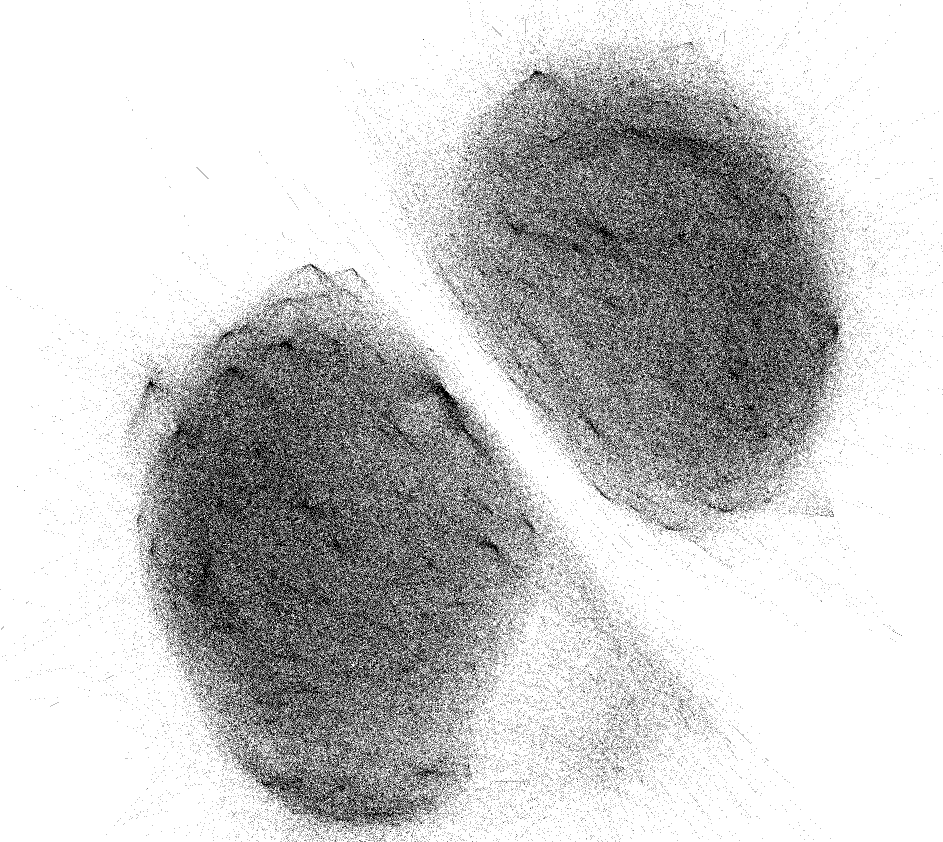# ![image.png]()

In [53]:
bulls_list = list(df_bulls['id'])
cows_list = list(df_cows['id'])

In [54]:
families_dict['big_family_1'] = families_dict['US00000048848mergedoff'].copy()
del families_dict['US00000048848mergedoff']

families_dict['big_family_2'] = families_dict['US00000076236mergedoff'].copy()
del families_dict['US00000076236mergedoff']

In [55]:
# @title bulls in big families

family1_bulls = list()
family2_bulls = list()

for cow in families_dict['big_family_1']:
  if cow in bulls_list:
    family1_bulls.append(cow)

for cow in families_dict['big_family_2']:
  if cow in bulls_list:
    family2_bulls.append(cow)

print('bulls in big_family_1: ', len(family1_bulls))
print(*family1_bulls, sep=', ')
print()
print('bulls in big_family_2: ', len(family2_bulls))
print(*family2_bulls, sep=', ')

bulls in big_family_1:  20
US00000001653, FR00000000479, GB00000002348, US00000000795, RU00000003147, US00000003013, US00000002804, RU00000002787, DE00000001742, DE00000003760, NL00000001842, DE00000003486, FR00000002912, GB00000002899, NL00000003091, RU00000002534, FR00000003214, GB00000002585, US00000003459, US00000003507

bulls in big_family_2:  19
FR00000051087, NL00000050889, GB00000051000, NL00000060143, NL00000051057, FR00000051052, FR00000051194, NL00000050449, NL00000050788, US00000051108, RU00000051274, RU00000051449, NL00000051437, DE00000073683, US00000051455, GB00000051128, DE00000080214, GB00000052082, GB00000064975


In [56]:
# @title cow information

def branch(cow, counter):
  if cow in pedigree_dict:
    if counter == 7:
      return 0
    print(f'{cow}: {pedigree_dict[cow]}')
    for i in pedigree_dict[cow]:
      branch(i, counter + 1)
  else:
    print(cow)
    print()

def cow_inf(cow):
  family = cow_family_dict[cow]
  print('cow:', cow)
  print('cows_family:', family)
  print('family_members:', families_dict[family])
  print('amount_of_members_in_family:', len(families_dict[family]))
  '''
  for i in families_dict[family]:
    out = pedigree_dict.get(i, -1)
    if out != -1:
      print(f'cow: {i} parents: {out}')
  '''
  print('branch_of_cow:')
  branch(cow, 1)
  print('\n')

In [57]:
cow_inf('GB00000054880')

cow: GB00000054880
cows_family: US00000076236mergedoff
family_members: []
amount_of_members_in_family: 0
branch_of_cow:
GB00000054880: ['RU00000065933']
RU00000065933: ['DE00000074476']
DE00000074476: []




# search of coefficient of inbreeding

In [58]:
# @title search of cow's ancestors and common cow's ancestors

def cow_tree(cow, counter, ancestor_depth_dict):  # ancestor_depth_dict - {ancestor: [path lengths to cow]}
  if cow in pedigree_dict:
    family = pedigree_dict[cow]

    if counter == 7:
      return 0

    for parent in family:
      ancestor_depth_dict[parent].append(counter)
      cow_tree(parent, counter + 1, ancestor_depth_dict)

def matching_cow_tree(cow, counter, ancestor_depth_dict, other_ancestor_depth_dict, matching_dict): # function to filter out the ancestors of those ancestors that form a path
  if cow in pedigree_dict:
    family = pedigree_dict[cow]

    if counter == 7:
      return 0

    for parent in family:
      ancestor_depth_dict[parent].append(counter)
      if parent in matching_dict:
        other_ancestor_depth_dict[parent] = matching_dict[parent]
      else:
        cow_tree(parent, counter + 1, ancestor_depth_dict)

In [59]:
# @title inbreed coefficient formula

def inbreeding_coef_formula(path_lengths):
  c = 0
  for n, f in path_lengths:
    c += (0.5) ** (n + 1) * (1 + f)
  return c

In [60]:
# @title computing inbreeding coefficient for pair

from itertools import product

def inbreeding_coef(parent_list):

  if len(parent_list) < 2:
    return 0

  cow_girl = parent_list[0]
  cow_boy = parent_list[1]
  if cow_family_dict[cow_boy] != cow_family_dict[cow_girl]:
    return 0

  path_lengths = list()

  boy_ancestors = defaultdict(list)
  girl_ancestors = defaultdict(list)

  girl_ancestors[cow_girl] = [0]
  boy_ancestors[cow_boy] = [0]

  all_boy_ancestors = defaultdict(list)
  cow_tree(cow_boy, 1, all_boy_ancestors)

  matching_cow_tree(cow_girl, 1, girl_ancestors, boy_ancestors, all_boy_ancestors) # function to picking right common ancestors

  common_ancestors_COI = dict()

  for ancestor in boy_ancestors:
    if ancestor in girl_ancestors:

      if ancestor in pedigree_dict:
        common_ancestors_COI[ancestor] = inbreeding_coef(pedigree_dict[ancestor])
      else:
        common_ancestors_COI[ancestor] = 0

  for ancestor in common_ancestors_COI.keys():
    for girl_path, boy_path in product(girl_ancestors[ancestor], boy_ancestors[ancestor]):
      path_lengths.append((girl_path + boy_path, common_ancestors_COI[ancestor]))

  COI = inbreeding_coef_formula(path_lengths)


  return COI


# missing ebv values

for missing values of ebv:

1.   ebv depends on the parents, therefore for missing values, it can be found by pedigree.

2.   if there is not enough information about the ancestors, need to take the ebv as zero, because it usually reflects the expected deviation from the average.




In [61]:
# @title search ebv values

def search_ebv(cow, ebv_dict):
  if cow in ebv_dict:
    if not pd.isna(ebv_dict[cow]):
      return ebv_dict[cow]

  if cow in pedigree_dict:
    sum = 0
    count = 0
    for parent in pedigree_dict[cow]:
      count += 1
      sum += search_ebv(parent, ebv_dict)

    if count == 0:
      return 0
    else:
      return sum / count
  else:
    return 0


for bull in bulls_ebv_dict:
  if pd.isna(bulls_ebv_dict[bull]):
    ebv = search_ebv(bull, bulls_ebv_dict)
    bulls_ebv_dict[bull] = ebv

for cow in cows_ebv_dict:
  if pd.isna(cows_ebv_dict[cow]):
    ebv = search_ebv(cow, cows_ebv_dict)
    cows_ebv_dict[cow] = ebv


In [62]:
# @title sorting of bulls and cows by ebv
bulls_ebv_dict = dict(sorted(bulls_ebv_dict.items(), key=lambda item: item[1], reverse=True))
cows_ebv_dict = dict(sorted(cows_ebv_dict.items(), key=lambda item: item[1], reverse=True))

# **optimal matchmaking**

to maximize the average for cows with a lower ebv, bulls with a higher ebv are selected in accordance with the restrictions.

In [77]:
# @title pairs of bulls and cows

cow_stak = list(cows_ebv_dict.keys())
bull_stak = list(bulls_ebv_dict.keys())

cow_bull_pair_dict = dict()
cow_bull_pair_ebv_dict = dict()

bull_count_dict = defaultdict(int)

MAX_bull_count = 0.1 * len(cow_stak) # 10% of cows


while True:

  cow = cow_stak[-1]
  for bull in bull_stak:

    if inbreeding_coef([cow, bull]) < 0.05:

      cow_bull_pair_dict[cow] = bull
      cow_bull_pair_ebv_dict[cow] = (cows_ebv_dict[cow] + bulls_ebv_dict[bull]) / 2

      bull_count_dict[bull] += 1
      if bull_count_dict[bull] >= MAX_bull_count - 1:
        bull_stak.remove(bull)
      break


  if len(cow_stak) == 1:
    break
  cow_stak.pop()

print('mean ebv: ', np.mean(list(cow_bull_pair_ebv_dict.values())))
print('standart deviation: ', np.std(list(cow_bull_pair_ebv_dict.values())))

mean ebv:  888.4746128543984
standart deviation:  158.573925131495


In [84]:
answer = pd.DataFrame(list(cow_bull_pair_dict.items()), columns=['cow_id', 'bull_id'])
answer.to_csv('cow_bull_assignments.csv')
answer

,cow_id,bull_id
0,US00000064882,US00000000795
1,NL00000071692,US00000000795
2,RU00000080655,US00000000795
3,US00000072956,US00000000795
4,US00000082041,US00000000795
...,...,...
17172,NL00000004886,GB00000002585
17173,DE00000014083,GB00000002585
17174,DE00000023145,GB00000002585
17175,FR00000011732,GB00000002585
